In [13]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp

In [14]:
df=pd.read_csv('bw_smoking.csv')

In [15]:
df

,nprevist,alcohol,tripre1,tripre2,tripre3,tripre0,birthweight,smoker,unmarried,educ,age,drinks
0,12,0,1,0,0,0,4253,1,1,12,27,0
1,5,0,0,1,0,0,3459,0,0,16,24,0
2,12,0,1,0,0,0,2920,1,0,11,23,0
3,13,0,1,0,0,0,2600,0,0,17,28,0
4,9,0,1,0,0,0,3742,0,0,13,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,0,0,1,0,0,2520,0,0,12,42,0
2996,10,0,1,0,0,0,3062,0,0,17,27,0
2997,11,0,0,1,0,0,3799,0,0,12,28,0
2998,10,0,1,0,0,0,2070,1,0,11,21,0


In [16]:
df_s=df[df['smoker']==1]
df_ns=df[df['smoker']==0]
df1=df[['birthweight']]
df_sb=df_s[['birthweight']]
df_nsb=df_ns[['birthweight']]

In [17]:
np.mean(df1)

birthweight    3382.933667
dtype: float64

In [18]:
np.mean(df_sb)

birthweight    3178.831615
dtype: float64

In [19]:
np.mean(df_nsb)

birthweight    3432.059967
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

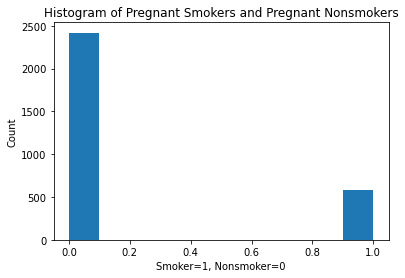

In [20]:
plt.hist(df['smoker'])
plt.title("Histogram of Pregnant Smokers and Pregnant Nonsmokers")
plt.xlabel("Smoker=1, Nonsmoker=0")
plt.ylabel("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

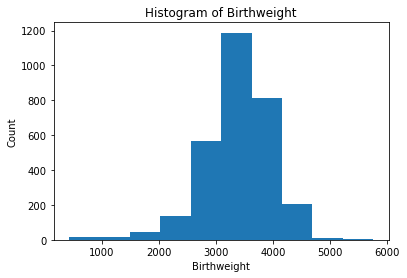

In [21]:
plt.hist(df1)
plt.title("Histogram of Birthweight")
plt.xlabel("Birthweight")
plt.ylabel("Count")
plt.show

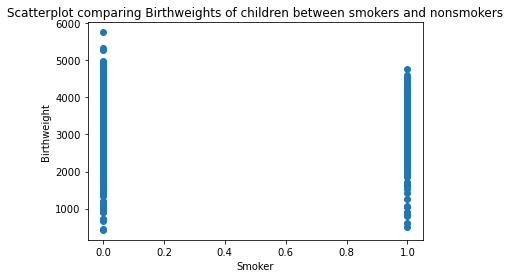

In [22]:
plt.scatter(df['smoker'], df['birthweight'])
plt.title("Scatterplot comparing Birthweights of children between smokers and nonsmokers")
plt.xlabel("Smoker")
plt.ylabel("Birthweight")
plt.show()

In [23]:
model=smf.ols(formula='birthweight~smoker', data = df)
results=model.fit(cov_type='HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            birthweight   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     89.21
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           6.90e-21
Time:                        06:18:59   Log-Likelihood:                -23364.
No. Observations:                3000   AIC:                         4.673e+04
Df Residuals:                    2998   BIC:                         4.674e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3432.0600     11.891    288.638      0.0

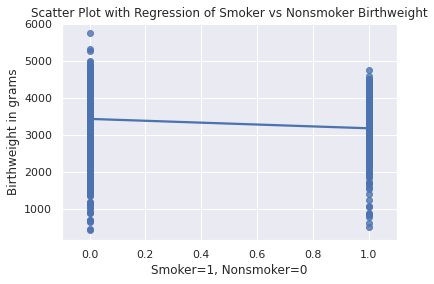

In [24]:
sns.set()
sns.regplot(x='smoker', y='birthweight', ci=None, data=df)
plt.xlabel("Smoker=1, Nonsmoker=0")
plt.ylabel("Birthweight in grams")
plt.title("Scatter Plot with Regression of Smoker vs Nonsmoker Birthweight")
plt.xlim(-0.1,1.1)
plt.show()

In [25]:
# 12. The intercept is β0 and is indicative of someone who doesn't smoke. For the mother's who dont smoke the birthweight is on average 3.423.0600 grams
#     The smoker variable (β1) is multiplied by the regressor. On average when the mother does smoke the baby has a birthweight of 253 grams less. 
#     In this case the test statistic value, -9.445, is incredibly small, proving that there is a negative correlation between birthweight and smoking while pregnant. This goes beyond a 5% level of confidence as -9.445<2.17
#     The null hypothesis would be β1=0 and the alternative would be β1≠0 with the null ultimately being rejected 

In [26]:
# 13. [-305.76, -200.681]

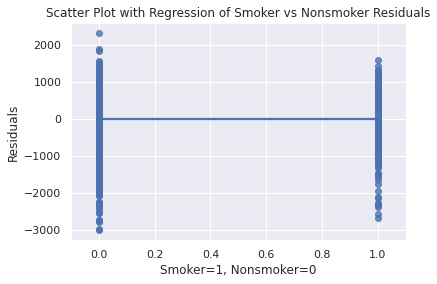

In [30]:
df['resid'] = results.resid
sns.set()
sns.regplot(x='smoker', y='resid', ci=None, data=df)
plt.xlabel("Smoker=1, Nonsmoker=0")
plt.ylabel("Residuals")
plt.title("Scatter Plot with Regression of Smoker vs Nonsmoker Residuals")
plt.xlim(-0.1,1.1)
plt.show()

In [31]:
# 14. Homoskedasticity and Heteroskedasticity describe the distributions of points within in a scatter plot. 
#     Homo implies a uniform distirbution, while hetero implies a distribution that narrows at some part, or is overall uneven in some way. 
#     In this specific distribution, the points narrow towards the end resulting in a homoskedastic distribution. 

In [33]:
# 15. The OlS assumption holds because as shown by the scatter plot with the regression line, the regression line is flat, along the y=0 line. 
#     The residuals are uncorrelated with the regressor. 
#     As for the other variables that could affect birthweight, it could be things such as alcohol consumption, education, nutrition, and income level that could possibly affect brithweight of babies.  